In [21]:
from Bio import SeqIO
import jsonlines
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
tlp = 'C:\\Users\\jinya\\Desktop\\bio\\pa\\{}'
m={"A":0,"C":1,"G":2,"T":3}
train = pd.read_csv(tlp.format("polya_train.csv"))
test = pd.read_csv(tlp.format("polya_test.csv"))

def feature(l):
    lst = []
    for s in l:
#         s = s[3:-3]
        length = len(s)
        idxs =[m[c] for c in s]
        a=np.zeros((length,4))
        a[list(range(length)),[idxs]]=1
        lst.append(a.flatten())
    return np.array(lst)

# pos, neg = [],[]
# for name in ("pinstances.fasta", "ninstances.fasta"):
#     for v in SeqIO.parse(tlp.format(name), "fasta"):
#         if name =="pinstances.fasta":
#             pos.append(str(v.seq))
#         else:
#             neg.append(str(v.seq))

X=feature(train["seq"].values)
y=np.array(train["label"].values)
x_test=feature(test["seq"].values)
y_test=np.array(test["label"].values)
y

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

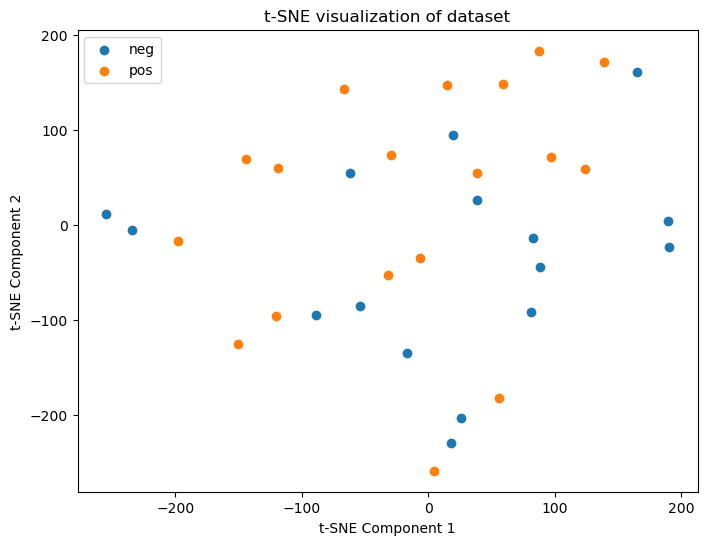

In [96]:


from sklearn.manifold import TSNE

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X)
target_names=["neg","pos"]

# 绘制 t-SNE 降维结果
plt.figure(figsize=(8, 6))
for i in range(len(target_names)):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=target_names[i])
# plt.xlim(min(X_tsne[:, 0])-10, max(X_tsne[:, 0])+10)
# plt.ylim(min(X_tsne[:, 1])-10, max(X_tsne[:, 1])+10)
plt.legend()
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE visualization of dataset")
plt.show()
    


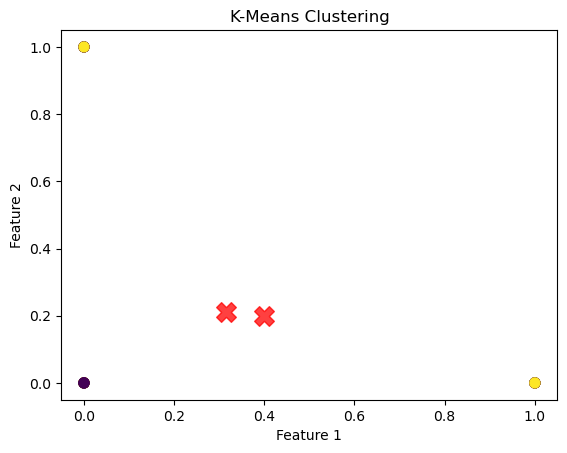

In [11]:
from sklearn.cluster import KMeans
# 使用 K-Means 进行聚类
kmeans = KMeans(n_clusters=2, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 绘制结果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 创建KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X, y)

# 预测
y_pred = knn.predict(X)

# 评估模型
accuracy = accuracy_score(y_pred, y)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))

y_pred = knn.predict(x_test)

# 评估模型
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Confusion Matrix:
[[13  3]
 [ 4 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.82      0.78      0.80        18

    accuracy                           0.79        34
   macro avg       0.79      0.80      0.79        34
weighted avg       0.80      0.79      0.79        34

Accuracy: 0.60
Confusion Matrix:
[[1 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



[1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1]
Accuracy: 1.00
Confusion Matrix:
[[16  0]
 [ 0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

[1 0 0 0 1]
Accuracy: 0.60
Confusion Matrix:
[[1 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



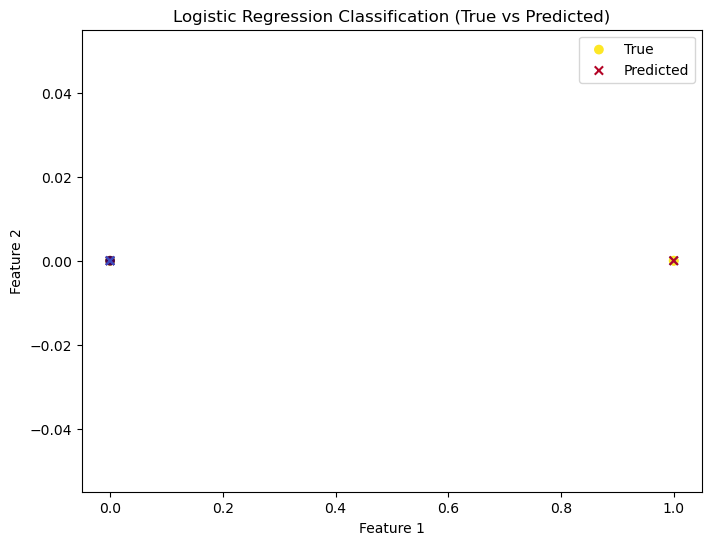

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 创建Logistic回归分类器
log_reg = LogisticRegression(C=2,penalty="l1",solver='liblinear')

# 训练模型
log_reg.fit(X, y)


# 预测
y_pred = log_reg.predict(X)
print(y_pred)

# 评估模型
accuracy = accuracy_score(y_pred, y)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))
# 预测
y_pred = log_reg.predict(x_test)
# 评估模型
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 可视化（以二维特征空间为例）
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', marker='o', label='True')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Classification (True vs Predicted)")
plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

log_reg = LogisticRegression(solver='liblinear')
selector = RFE(log_reg, n_features_to_select=5)  # 选择 5 个最重要的特征
selector = selector.fit(X, y)
# X_train= selector.transform(X)
# x_test_selected = selector.transform(x_test)
X_train= X
x_test_selected = x_test


# 创建 Logistic 回归对象
log_reg = LogisticRegression()

# 定义超参数网格
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0,2,5, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300,500]
}

# 使用网格搜索进行超参数调整
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y)

# 输出最佳参数和最佳模型性能
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(x_test_selected)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'C': 10.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.6238095238095238
Accuracy: 0.60
Confusion Matrix:
[[1 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



In [103]:
y_test

array([1, 0, 1, 1, 1])

In [110]:
y_pred

array([1, 0, 1, 1, 0])